# Multivariable Regression Sample
Importing required libraries

In [23]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')


### Data Collection


In [24]:
boston_dataset = load_boston()

### Data Cleaning and Visualisation

c:\users\balaz\source\repos\cost-calculator\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

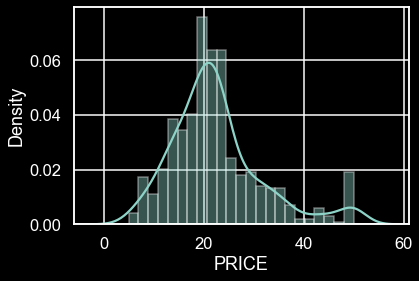

In [25]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Adding price
data['PRICE'] = boston_dataset.target

# Checking for missing values, false is good
pd.isnull(data).any()

# Visualisation
sns.distplot(data['PRICE'])


### Data Correlation
Example on how to calculate a correlation between attributes.

In [26]:
# For two variables
print(data['PRICE'].corr(data['RM']))

# For all the attributes - Pearson => only for continuous attributes
print(data.corr())

0.6953599470715396
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -

Heatmap

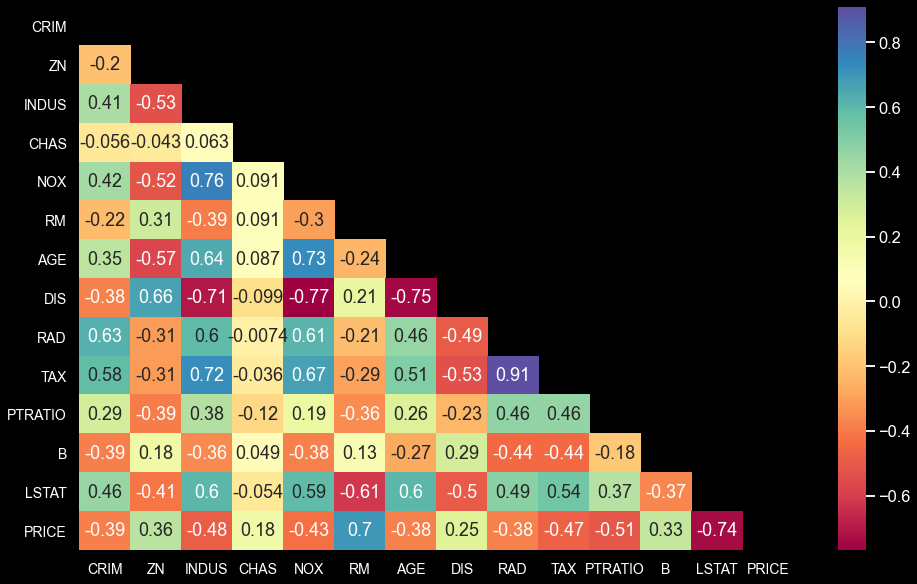

In [27]:
mask = np.zeros_like(data.corr())
triangle_ind = np.triu_indices_from(mask)
mask[triangle_ind] = True
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot = True, cmap='Spectral')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Styled Scatter

c:\users\balaz\source\repos\cost-calculator\venv\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


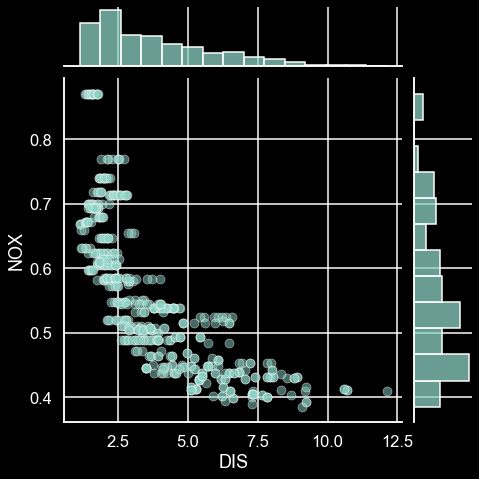

In [29]:
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'],
              size=7, joint_kws={'alpha': 0.5})

